# Processing texts using spaCy

This section introduces you to basic tasks in natural language processing and how they can be performed using a Python library named spaCy.

After reading this section, you should:

 - know some of the key concepts and tasks in natural language processing
 - know how to perform simple natural language processing tasks using the spaCy library

## Getting started

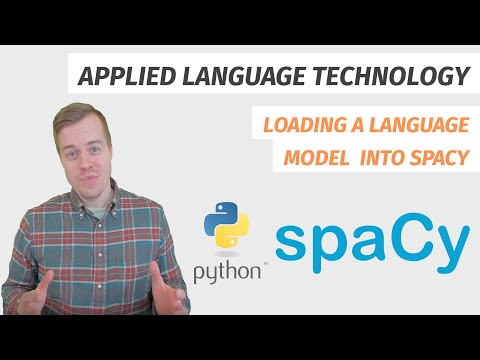

In [1]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('hJ6PJoITa6I', height=350, width=600)

To get started, we import [spaCy](https://spacy.io/), one of the many libraries available for natural language processing in Python.

In [2]:
# Import the spaCy library
import spacy

2022-08-25 14:06:56.441190: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-25 14:06:56.441234: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


To perform natural language processing tasks for a given language, we must load a _language model_ that has been trained to perform these tasks for the language in question. 

spaCy supports [many languages](https://spacy.io/usage/models#languages), but provides pre-trained [language models](https://spacy.io/models/) for fewer languages.

These language models come in different sizes and flavours. We will explore these models and their differences later. 

To get acquainted with basic tasks in natural language processing, we will start with a small language model for the English language.

Language models are loaded using spaCy's `load()` function, which takes the name of the model as input.

In [3]:
# Load the small language model for English and assign it to the variable 'nlp'
nlp = spacy.load('en_core_web_sm')

# Call the variable to examine the object
nlp

Calling the variable `nlp` returns a spaCy [_Language_](https://spacy.io/api/language) object that contains a language model for the English language.

Esentially, spaCy's *Language* object is a pipeline that uses the language model to perform a number of natural language processing tasks. We will return to these tasks shortly below.

### What is a language model?

Most modern language models are based on *statistics* instead of human-defined rules. 

Statistical language models are based on probabilities, e.g.: 

 - What is the probability of a given sentence occurring in a language? 
 - How likely is a given word to occur in a sequence of words?

Consider the following sentences from the news articles from the previous sections:

> From financial exchanges in `HIDDEN` Manhattan to cloakrooms in Washington and homeless shelters in California, unfamiliar rituals were the order of the day.

> Security precautions were being taken around the `HIDDEN` as the deadline for Iraq to withdraw from Kuwait neared.

You can probably make informed guesses on the `HIDDEN` words based on your knowledge of the English language and the world in general.

Similarly, creating a statistical language model involves observing the occurrence of words in large corpora and calculating their probabilities of occurrence in a given context. The language model can then be trained by making predictions and adjusting the model based on the errors made during prediction.

### How are language models trained?

The small language model for English, for instance, is trained on a corpus called [OntoNotes 5.0](https://catalog.ldc.upenn.edu/LDC2013T19), which features texts from different *genres* such as newswire text, broadcast news, broadcast and telephone conversations and blogs.

This allows the corpus to cover linguistic variation in both written and spoken English.

The OntoNotes 5.0 corpus consists of more than just *plain text*: the annotations include *part-of-speech tags*, *syntactic dependencies* and *co-references* between words.

This allows modelling not just the occurrence of particular words or their sequences, but their grammatical features as well.

## Performing basic NLP tasks using spaCy

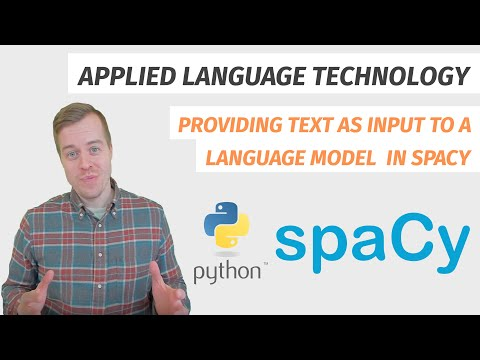

In [4]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('kJjKJ6qlQmM', height=350, width=600)

To process text using the *Language* object containing the language model for English, we simply call the *Language* object `nlp` on some text.

Let's begin by defining a simple test sentence, a Python string object that is stored under the variable `text`.

As usual, we can print out the contents by calling the variable.

In [5]:
# Assign an example sentence to the variable 'text'
text = "The Federal Bureau of Investigation has been ordered to track down as many as 3,000 Iraqis in this country whose visas have expired, the Justice Department said yesterday."

# Call the variable to examine the output
text

'The Federal Bureau of Investigation has been ordered to track down as many as 3,000 Iraqis in this country whose visas have expired, the Justice Department said yesterday.'

Passing the variable `text` to the _Language_ object `nlp` returns a spaCy *Doc* object, short for document.

In natural language processing, longer pieces of text are commonly referred to as documents, although in this case our document consists of a single sentence.

This object contains both the input text stored under `text` and the results of natural language processing using spaCy.

In [6]:
# Feed the string object under 'text' to the Language object under 'nlp'
# Store the result under the variable 'doc'
doc = nlp(text)

The _Doc_ object is now stored under the variable `doc`.

In [7]:
# Call the variable to examine the object
doc

The Federal Bureau of Investigation has been ordered to track down as many as 3,000 Iraqis in this country whose visas have expired, the Justice Department said yesterday.

Calling the variable `doc` returns the contents of the object.

Although the output resembles that of a Python string, the *Doc* object contains a wealth of information about its linguistic structure, which spaCy generated by passing the text through the NLP pipeline.

We will now examine the tasks that were performed under the hood after we provided the input sentence to the language model.

### Tokenization

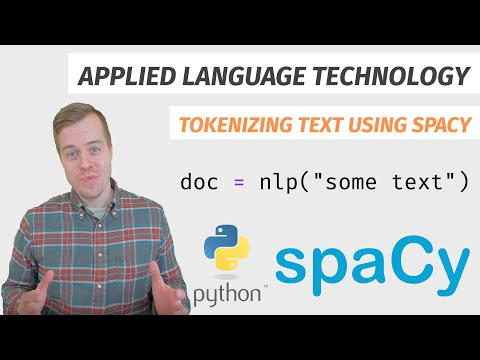

In [8]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('hVOSVlWnl_k', height=350, width=600)

What takes place first is a task known as *tokenization*, which breaks the text down into analytical units in need of further processing. 

In most cases, a *token* corresponds to words separated by whitespace, but punctuation marks are also considered as independent tokens. Because computers treat words as sequences of characters, assigning punctuation marks to their own tokens prevents trailing punctuation from attaching to the words that precede them.

The diagram below the outlines the tasks that spaCy can perform after a text has been tokenised, such as *part-of-speech tagging*, *syntactic parsing* and *named entity recognition*.

![The spaCy pipeline from https://spacy.io/usage/linguistic-features#section-tokenization](img/spacy_pipeline.png)

A spaCy _Doc_ object is consists of a sequence of *Token* objects, which store the results of various natural language processing tasks.

Let's print out each *Token* object stored in the _Doc_ object `doc`.

In [9]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in doc:  
    
    # Print each token
    print(token)  

The
Federal
Bureau
of
Investigation
has
been
ordered
to
track
down
as
many
as
3,000
Iraqis
in
this
country
whose
visas
have
expired
,
the
Justice
Department
said
yesterday
.


The output shows one _Token_ per line. As expected, punctuation marks such as '.' and ',' constitute their own _Tokens_.

### Part-of-speech tagging

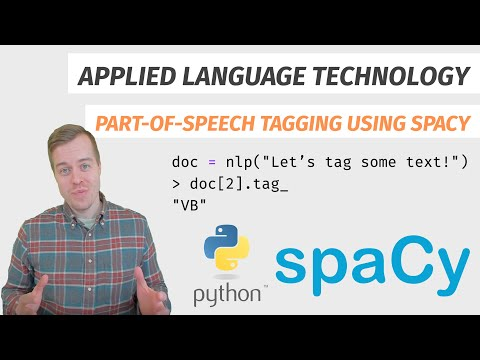

In [10]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('F2bLdmzc2X4', height=350, width=600)

Part-of-speech (POS) tagging is the task of determining the word class of a token. This is crucial for *disambiguation*, because different parts of speech may have similar forms.

Consider the example: *The sailor dogs the hatch*.

The present tense of the verb *dog* (to fasten something with something) is precisely the same as the plural form of the noun *dog*: *dogs*.

To identify the correct word class, we must examine the context in which the word appears.

*spaCy* provides two types of part-of-speech tags, *coarse* and *fine-grained*, which are stored under the attributes `pos_` and `tag_`, respectively.

We can access the attributes of a Python object by inserting the *attribute* after the *object* and separating them with a full stop, e.g. `token.pos_`.

To access the results of POS tagging, let's loop over the *Doc* object `doc` and print each *Token* and its coarse and fine-grained part-of-speech tags.

In [11]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in doc:
    
    # Print the token and the POS tags
    print(token, token.pos_, token.tag_)

The DET DT
Federal PROPN NNP
Bureau PROPN NNP
of ADP IN
Investigation PROPN NNP
has AUX VBZ
been AUX VBN
ordered VERB VBN
to PART TO
track VERB VB
down ADP RP
as ADV RB
many ADJ JJ
as ADP IN
3,000 NUM CD
Iraqis PROPN NNPS
in ADP IN
this DET DT
country NOUN NN
whose DET WP$
visas NOUN NNS
have AUX VBP
expired VERB VBN
, PUNCT ,
the DET DT
Justice PROPN NNP
Department PROPN NNP
said VERB VBD
yesterday NOUN NN
. PUNCT .


The coarse part-of-speech tags available under the `pos_` attribute are based on the [Universal Dependencies](https://universaldependencies.org/u/pos/all.html) tag set.

The fine-grained part-of-speech tags under `tag_`, in turn, are based on the OntoNotes 5.0 corpus introduced above.

In contrast to coarse part-of-speech tags, the fine-grained tags also encode [grammatical information](https://spacy.io/api/annotation#pos-en). The tags for verbs, for example, are distinguished by aspect and tense. 

### Quick exercise

Define a string object with some text in English. Be creative and think of language use on social media – and feed the string to the language model stored under the variable `nlp`. 

Store the result under the variable `my_text`, e.g.

`my_text = nlp("Your example goes here.")`

In [12]:
### Enter your code below this line and run the cell (press Shift and Enter at the same time)
my_text=nlp('Hi everyone, my name is Mia and I am glad to be here.')


Next, print the part of speech tags for each _Token_ in your Doc object `my_text`.

In [13]:
### Enter your code below this line and run the cell (press Shift and Enter at the same time)
for words in my_text:
    print(words,words.pos_,words.tag_)

Hi INTJ UH
everyone PRON NN
, PUNCT ,
my PRON PRP$
name NOUN NN
is AUX VBZ
Mia PROPN NNP
and CCONJ CC
I PRON PRP
am AUX VBP
glad ADJ JJ
to PART TO
be AUX VB
here ADV RB
. PUNCT .


Is the language model able to classify the parts-of-speech correctly?

### Morphological analysis

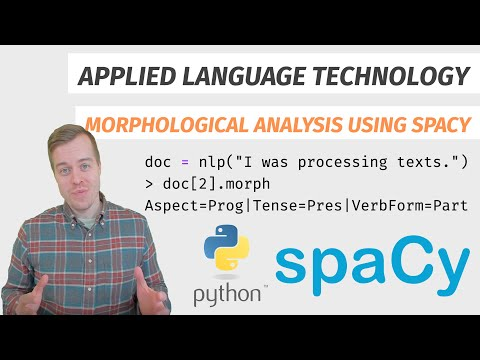

In [14]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('1iliKkbHF30', height=350, width=600)

Morphemes constitute the smallest grammatical units that carry meaning. Two types of morphemes are generally recognised: *free* morphemes, which consist of words that can stand on their own, and *bound* morphemes, which inflect other morphemes. For the English language, bound morphemes include suffixes such as _-s_, which is used to indicate the plural form of a noun.

Put differently, morphemes shape the external *form* of a word, and these forms are associated with given grammatical *functions*.

spaCy performs morphological analysis automatically and stores the result under the attribute `morph` of a _Token_ object.

In [15]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in doc:

    # Print the token and the results of morphological analysis
    print(token, token.morph)

The Definite=Def|PronType=Art
Federal Number=Sing
Bureau Number=Sing
of 
Investigation Number=Sing
has Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin
been Tense=Past|VerbForm=Part
ordered Aspect=Perf|Tense=Past|VerbForm=Part
to 
track VerbForm=Inf
down 
as 
many Degree=Pos
as 
3,000 NumType=Card
Iraqis Number=Plur
in 
this Number=Sing|PronType=Dem
country Number=Sing
whose Poss=Yes
visas Number=Plur
have Mood=Ind|Tense=Pres|VerbForm=Fin
expired Aspect=Perf|Tense=Past|VerbForm=Part
, PunctType=Comm
the Definite=Def|PronType=Art
Justice Number=Sing
Department Number=Sing
said Tense=Past|VerbForm=Fin
yesterday Number=Sing
. PunctType=Peri


As the output shows, all _Tokens_ do not have morphological information, because they consist of free morphemes.

To retrieve morphological information from a _Token_ object, we must use the `get()` method of the `morph` attribute.

We can use the brackets `[]` to access items in the _Doc_ object.

The following line retrieves morphological information about aspect for the 22nd _Token_ in the _Doc_ object.

In [16]:
# Retrieve morphological information on aspect for the Token at index 22 in the Doc object
doc[22].morph.get('Aspect')

['Perf']

This returns a list with a single string item _Perf_, which refers to the perfective aspect.

What if we attempt to retrieve a morphological feature that a _Token_ does not have?

Let's attempt to retrieve information on aspect for the 21st _Token_ in the _Doc_ object.

In [17]:
# Retrieve morphological information on aspect for 21st Token in the Doc object
doc[21].morph.get('Aspect')

[]

This returns an empty list, as indicated by the brackets `[ ]` with nothing between them.

To retrieve all the morphological information available for a given _Token_, the best solution is to use the `to_dict()` method of the `morph` attribute.

This returns a dictionary, a Python data structure consisting of _key_ and _value_ pairs.

In [18]:
# Retrieve morphological information for 21st Token in the Doc object
# Use the to_dict() method to cast the result into a dictionary
doc[21].morph.to_dict()

{'Mood': 'Ind', 'Tense': 'Pres', 'VerbForm': 'Fin'}

A Python dictionary is marked by curly brackets `{ }`. Each key/value pair is separated by a colon `:`. In this case, both keys and values consist of string objects.

The value stored under a key may be accessed by placing the key name in brackets `[ ]` and placing this right after the name of the dictionary, as shown below.

In [19]:
# Assign morphological information to the dictionary 'morph_dict' 
morph_dict = doc[21].morph.to_dict()

# Get the value corresponding to the key 'Mood'
morph_dict['Mood']

'Ind'

Dictionaries are a powerful data structure in Python, which we will frequently use for storing information.

### Syntactic parsing

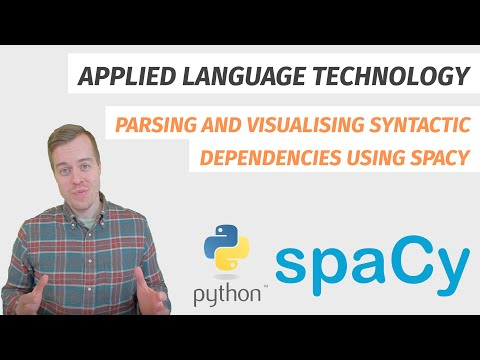

In [20]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('2TBNpxAbh_g', height=350, width=600)

Syntactic parsing (or *dependency parsing*) is the task of defining syntactic dependencies that hold between tokens. 

The syntactic dependencies are available under the `dep_` attribute of a *Token* object.

Let's print out the syntactic dependencies for each *Token* in the *Doc* object.

In [21]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in doc:
    
    # Print the token and its dependency tag
    print(token, token.dep_)

The det
Federal compound
Bureau nsubjpass
of prep
Investigation pobj
has aux
been auxpass
ordered ccomp
to aux
track xcomp
down prt
as advmod
many amod
as quantmod
3,000 nummod
Iraqis dobj
in prep
this det
country pobj
whose poss
visas nsubj
have aux
expired relcl
, punct
the det
Justice compound
Department nsubj
said ROOT
yesterday npadvmod
. punct


Unlike part-of-speech tags that are associated with a single _Token_, dependency tags indicate a relation that holds between two *Tokens*.

To better understand the syntactic relations captured by dependency parsing, let's use some of the additional attributes available for each *Token*:

 1. `i`: the position of the *Token* in the *Doc*
 2. `token`: the *Token* itself
 3. `dep_`: a tag for the syntactic relation
 4. `head` and `i`: the *Token* that governs the current *Token* and its index
 
This illustrates how Python attributes can be used in a flexible manner: the attribute `head` points to another *Token*, which naturally has the attribute `i` that contains its index or position in the *Doc*. We can combine these two attributes to retrieve this information for any token by referring to `.head.i`.

In [22]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in doc:
    
    # Print the index of current token, the token itself, the dependency, the head and its index
    print(token.i, token, token.dep_, token.head.i, token.head)

0 The det 2 Bureau
1 Federal compound 2 Bureau
2 Bureau nsubjpass 7 ordered
3 of prep 2 Bureau
4 Investigation pobj 3 of
5 has aux 7 ordered
6 been auxpass 7 ordered
7 ordered ccomp 27 said
8 to aux 9 track
9 track xcomp 7 ordered
10 down prt 9 track
11 as advmod 14 3,000
12 many amod 14 3,000
13 as quantmod 14 3,000
14 3,000 nummod 15 Iraqis
15 Iraqis dobj 9 track
16 in prep 15 Iraqis
17 this det 18 country
18 country pobj 16 in
19 whose poss 20 visas
20 visas nsubj 22 expired
21 have aux 22 expired
22 expired relcl 18 country
23 , punct 27 said
24 the det 26 Department
25 Justice compound 26 Department
26 Department nsubj 27 said
27 said ROOT 27 said
28 yesterday npadvmod 27 said
29 . punct 27 said


Although the output above helps to clarify the syntactic dependencies between tokens, they are generally much easier to perceive using diagrams.

spaCy provides a [visualisation tool](https://spacy.io/usage/visualizers) for visualising dependencies. This component of the spaCy library, _displacy_, can be imported using the following command.

In [23]:
from spacy import displacy

The `displacy` module has a function named `render()`, which takes a _Doc_ object as input.

To draw a dependency tree, we provide the _Doc_ object `doc` to the `render()` function with two arguments:

 1. `style`: The value `dep` instructs _displacy_ to draw a visualisation for syntactic dependencies.
 2. `options`: This argument takes a Python dictionary as input. We provide a dictionary with the key `compact` and Boolean value `True` to instruct _displacy_ to draw a compact tree diagram. Additional options for formatting the visualisation can be found in spaCy [documentation](https://spacy.io/api/top-level#displacy_options).

In [24]:
displacy.render(doc, style='dep', options={'compact': True})

The syntactic dependencies are visualised using lines that lead from the **head** *Token* to the *Token* governed by that head.

The dependency tags are based on [Universal Dependencies](https://universaldependencies.org/), a framework for describing morphological and syntactic features across languages (for a theoretical discussion of Universal Dependencies, see de Marneffe et al. [2021](https://doi.org/10.1162/coli_a_00402)).

If you don't know what a particular tag means, spaCy provides a function for explaining the tags, `explain()`, which takes a tag as input (note that the tags are case-sensitive).

In [25]:
spacy.explain('pobj')

'object of preposition'

### Quick exercise

Choose a tag that you don't know from the examples above and ask spaCy for an explanation using the `explain()` function.

Input the tag as a string – don't forget the quotation marks!

In [42]:
### Enter your code below this line and run the cell (press Shift and Enter at the same time)
spacy.explain('auxpass')

'auxiliary (passive)'

Finally, if you wonder about the underscores `_` in the attribute names: spaCy encodes all strings by mapping them to hash values (a numerical representation) for computational efficiency.

Let's print out the first Token in the Doc `[0]` and its dependencies to examine how this works.

In [27]:
print(doc[0], doc[0].dep, doc[0].dep_)

The 415 det


As you can see, the hash value 415 is reserved for the tag corresponding to a determiner (`det`). 

If you want human-readable output for dependency parsing and spaCy returns sequences of numbers, then you most likely forgot to add the underscore to the attribute name.

### Sentence segmentation

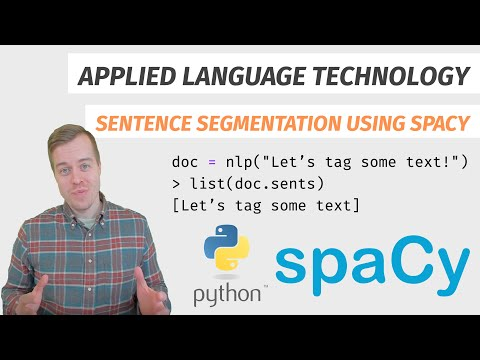

In [28]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('NknDZSRBT7Y', height=350, width=600)

spaCy also segments _Doc_ objects into sentences. This task is known as [_sentence segmentation_](https://spacy.io/usage/linguistic-features#section-sbd).

Sentence segmentation imposes additional structure to larger texts. By determining the boundaries of a sentence, we can constrain tasks such as dependency parsing to individual sentences.

spaCy provides access to the results of sentence segmentation via the attribute `sents` of a _Doc_ object.

Let's loop over the sentences contained in the _Doc_ object `doc` and count them using Python's `enumerate()` function.

Using the `enumerate()` function returns a count that increases with each item in the loop. 

We assign this count to the variable `number`, whereas each sentence is stored under `sent`. We then print out both at the same time using the `print()` function.

In [29]:
# Loop over sentences in the Doc object and count them using enumerate()
for number, sent in enumerate(doc.sents):
    
    # Print the token and its dependency tag
    print(number, sent)

0 The Federal Bureau of Investigation has been ordered to track down as many as 3,000 Iraqis in this country whose visas have expired, the Justice Department said yesterday.


This only returns a single sentence, but the _Doc_ object could easily hold a longer text with multiple sentences, such as an entire newspaper article.

### Lemmatization

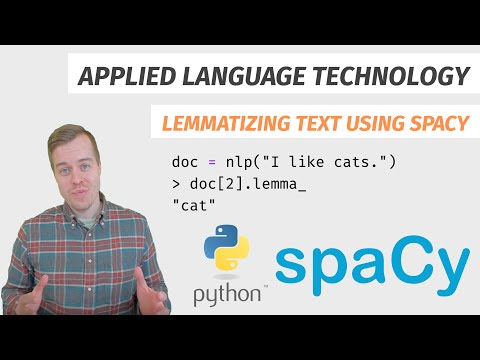

In [30]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('pvMImQEUlN4', height=350, width=600)

A lemma is the base form of a word. Keep in mind that unless explicitly instructed, computers cannot tell the difference between singular and plural forms of words, but treat them as distinct tokens, because their forms differ. 

If one wants to count the occurrences of words, for instance, a process known as _lemmatization_ is needed to group together the different forms of the same token.

Lemmas are available for each _Token_ under the attribute `lemma_`.

In [31]:
# Loop over items in the Doc object, using the variable 'token' to refer to items in the list
for token in doc:
    
    # Print the token and its dependency tag
    print(token, token.lemma_)

The the
Federal Federal
Bureau Bureau
of of
Investigation Investigation
has have
been be
ordered order
to to
track track
down down
as as
many many
as as
3,000 3,000
Iraqis Iraqis
in in
this this
country country
whose whose
visas visa
have have
expired expire
, ,
the the
Justice Justice
Department Department
said say
yesterday yesterday
. .


### Named entity recognition (NER)

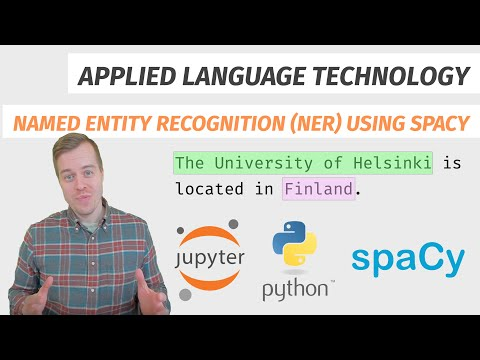

In [32]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('Gn_PjruUtrc', height=350, width=600)

Named entity recognition (NER) is the task of recognising and classifying entities named in a text. 

spaCy can recognise the [named entities annotated in the OntoNotes 5 corpus](https://spacy.io/api/annotation#named-entities), such as persons, geographic locations and products, to name but a few examples.

We can use the *Doc* object's `.ents` attribute to get the named entities.

In [33]:
doc.ents

(The Federal Bureau of Investigation,
 as many as 3,000,
 Iraqis,
 the Justice Department,
 yesterday)

This returns a tuple with the named entities.

Each item in the tuple is a spaCy *Span* object. *Span* objects can consist of multiple *Token* objects, as many named entities span multiple *Tokens*. 

The named entities and their types are stored under the attributes `.text` and `.label_` of each *Span* object.

Let's loop over the *Span* objects in the tuple and print out both attributes.

In [34]:
# Loop over the named entities in the Doc object 
for ent in doc.ents:

    # Print the named entity and its label
    print(ent.text, ent.label_)

The Federal Bureau of Investigation ORG
as many as 3,000 CARDINAL
Iraqis NORP
the Justice Department ORG
yesterday DATE


As you can see, the majority of named entities identified in the *Doc* consist of multiple *Tokens*, which is why they are represented as *Span* objects.

We can verify this by accessing the first named entity under `doc.ents`, which can be found at position `0`, because Python starts counting from zero, and feeding this object to Python's `type()` function.

In [35]:
# Check the type of the object used to store named entities
type(doc.ents[0])

spacy.tokens.span.Span

spaCy [*Span*](https://spacy.io/api/span) objects contain several useful arguments.

Most importantly, the attributes `start` and `end` return the indices of _Tokens_, which determine where the _Span_ starts and ends in the *Doc* object.

We can examine this in greater detail by printing out the `start` and `end` attributes for the first named entity in the document.

In [36]:
# Print the named entity and indices of its start and end Tokens
print(doc.ents[0], doc.ents[0].start, doc.ents[0].end)

The Federal Bureau of Investigation 0 5


The named entity starts at index 0 and ends at index 5 in the *Doc* object.

If we retrieve the sixth *Token* in the *Doc* object (at index 5), we will see that this corresponds to the *Token* "has".

In [37]:
doc[5]

has

This shows that the index returned by the `end` attribute does **not** correspond to the *last Token* in the *Span*  that contains the named entity, but returns the index of the *first Token* following the *Span*.

Let's examine this by looping over the slice of the *Doc* object that corresponds to the first named entity. 

In [38]:
# Loop over a slice of the Doc object that covers the first named entity
for token in doc[doc.ents[0].start: doc.ents[0].end]:
    
    # Print the Token and its index
    print(token, token.i)

The 0
Federal 1
Bureau 2
of 3
Investigation 4


As you can see, the `start` attribute means that the *Span* starts here, whereas the `end` attribute means that the *Span* has *ended* here.

We can also render the named entities using *displacy*, the spaCy module we used for visualising dependency parses above.

Note that we must pass the string `ent` to the `style` argument to indicate that we wish to visualise named entities.

In [39]:
displacy.render(doc, style='ent')

If you don't recognise a particular tag used for a named entity, you can always ask spaCy for an explanation.

In [40]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

### Quick exercise

Load the example texts in our data directory, feed them to the language model under `nlp` and explore the results.

How does the quality of optical character recognition affect the results of natural language processing?

In [44]:
# Import Path class from pathlib
from pathlib import Path

# Create a Path object pointing towards the corpus dir
corpus_dir = Path('data')

# Collect all .txt files
corpus_files = list(corpus_dir.glob('*.txt'))

# Loop over the files
for corpus_file in corpus_files:
    
    # Print a status message to separate the results
    print(f"\n[INFO] Now processing {corpus_file} ...\n")
    
    # Open the file for reading and read the contents (note the .read_text() method at the end)
    text = corpus_file.read_text(encoding='utf-8')
    
    # Feed the text to the spaCy language model / pipeline
    text = nlp(text)
    
    # Try out different things by uncommenting (remove # at the beginning of the line) 
    # some of the lines below
    
    # 1. Loop over a range of Tokens [130:150] and print out part-of-speech tags and dependencies
    for token in text[130:150]:
        
        print(token, token.pos_, token.tag_, token.dep_)
        
    # 2. Print out the first 20 named entities in the text
    for ent in text.ents[:20]:
        
        print(ent.text, ent.label_)
        
    # 3. Print out the sentences in each text. Enumerate them for clarity.
    for i, sent in enumerate(text.sents):
        
        print(i, sent)


[INFO] Now processing data/NYT_1991-01-16-A15.txt ...

shelters NOUN NNS conj
in ADP IN prep
California PROPN NNP pobj
, PUNCT , punct
unfamiliar ADJ JJ amod
rituals NOUN NNS nsubj
were AUX VBD ROOT
the DET DT det
order NOUN NN attr
of ADP IN prep
the DET DT det
day NOUN NN pobj
. PUNCT . punct
In ADP IN prep
many ADJ JJ amod
cities NOUN NNS pobj
, PUNCT , punct
identification NOUN NN compound
badges NOUN NNS nsubjpass
were AUX VBD aux
F.B.I. Is Ordered to ORG
Iraqis NORP
JAMES BARRON PERSON
New York Times ORG
Jan 16, 1991 DATE
The New York Times ORG
A15 ORG
U.S. GPE
Iraqis NORP
JAMES BARRON PERSON
The Federal Bureau of Investigation ORG
as many as 3,000 CARDINAL
Iraqis NORP
the Justice Department ORG
yesterday DATE
the United States GPE
Manhattan GPE
Washington GPE
California GPE
the day DATE
0 ﻿U.S. TAKING STEPS TO CURB
1 TERRORISM: F.B.I. Is Ordered to Find Iraqis Whose Visas Have Expired

2 By JAMES BARRON
New York Times (1923-Current file); Jan 16, 1991;
ProQuest Historical Newsp

This section should have given you an idea of some basic natural language processing tasks, how they can be performed using spaCy and what kinds of linguistic annotations they produce.

The [following section](04_basic_nlp_continued.ipynb) focuses on how to customise the tasks that spaCy performs on an input text. 